In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/avina/Ocular_Disease_Recognition/EyeDisease'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/Users/avina/Ocular_Disease_Recognition/EyeDisease\full_df.csv
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\data.xlsx
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1000_left.jpg
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1000_right.jpg
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1001_left.jpg
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1001_right.jpg
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1002_left.jpg
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1002_right.jpg
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1003_left.jpg
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1003_right.jpg
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images\1004_l

In [26]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("C:/Users/avina/Ocular_Disease_Recognition/EyeDisease/full_df.csv")
from IPython.display import display
display(df.head())


ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3       mild nonproliferative retinopathy  0  1  0  0  0  0  0  1   
4  moderate non proliferative retinopathy  0  1  0  0  0  0  0  0   

                                            filepath labels  \
0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   

                     target     filename  
0  [1, 0, 0, 0, 0, 0, 0, 0]  0_right.jpg  
1  [1, 0, 0, 0, 0, 0, 0, 0]  1_right.jpg  
2  [0, 1, 0, 0, 0, 0, 0, 0]  2_right.jpg  
3  [0, 1, 0, 0, 0, 0, 0, 0]  4_right.jpg  
4  [0, 1, 0, 0, 0, 0, 0, 0]  5_right.jpg

In [28]:
# Crude estimation of findings ratio
findings = df.iloc[:, 7:15]
totals = findings.sum()
totals

N    2101
D    2123
G     397
C     402
A     319
H     203
M     306
O    1588
dtype: int64

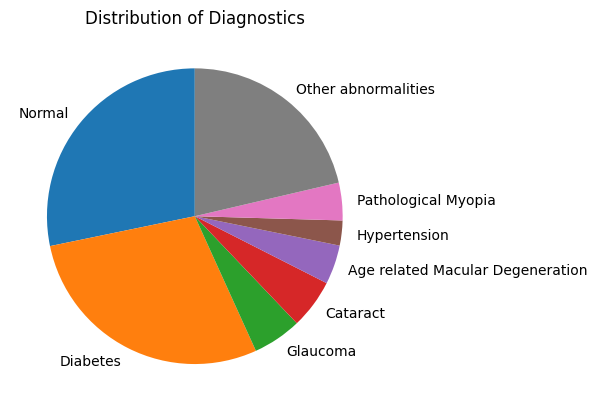

In [29]:
extended_labels = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Age related Macular Degeneration', 'Hypertension', 'Pathological Myopia', 'Other abnormalities']
plt.pie(totals, labels=extended_labels, startangle=90)

plt.title("Distribution of Diagnostics")

plt.show()

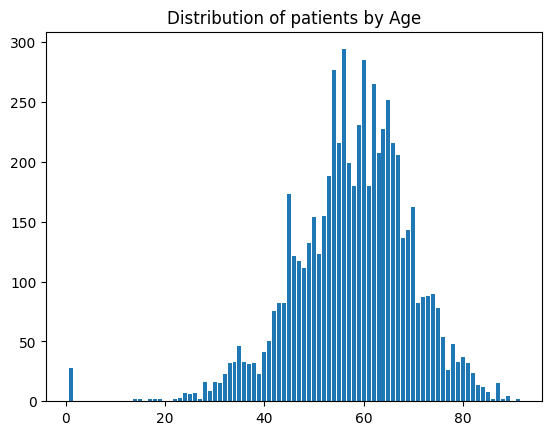

In [30]:
ages = df['Patient Age'].value_counts()
plt.bar(ages.index, ages)
plt.title("Distribution of patients by Age")
plt.show()

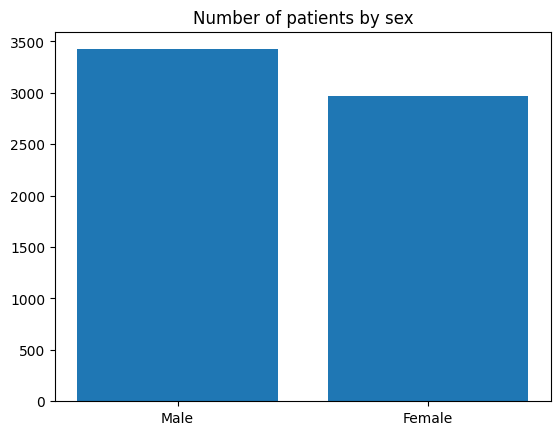

In [31]:
sex = df['Patient Sex'].value_counts()
plt.bar(sex.index, sex)
plt.title("Number of patients by sex")
plt.show()

# Image tagging


In [32]:
import pandas as pd
import numpy as np

import os
import shutil
import random

from sklearn.model_selection import train_test_split

import imageio
import matplotlib.pyplot as plt

In [33]:
df.head(5)

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3       mild nonproliferative retinopathy  0  1  0  0  0  0  0  1   
4  moderate non proliferative retinopathy  0  1  0  0  0  0  0  0   

                                            filepath labels  \
0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   

                     target     filename  
0  [1, 0, 0, 0, 0, 0, 0, 0]  0_right.jpg  
1  [1, 0, 0, 0, 0, 0, 0, 0]  1_right.jpg  
2  [0, 1, 0, 0, 0, 0, 0, 0]  2_right.jpg  
3  [0, 1, 0, 0, 0, 0, 0, 0]  4_right.jpg  
4  [0, 1, 0, 0, 0, 0, 0, 0]  5_right.jpg

In [34]:
df[df['Left-Fundus'] == '0_left.jpg']

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0      0           69      Female  0_left.jpg  0_right.jpg   
3194   0           69      Female  0_left.jpg  0_right.jpg   

     Left-Diagnostic Keywords Right-Diagnostic Keywords  N  D  G  C  A  H  M  \
0                    cataract             normal fundus  0  0  0  1  0  0  0   
3194                 cataract             normal fundus  0  0  0  1  0  0  0   

      O                                           filepath labels  \
0     0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
3194  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['C']   

                        target     filename  
0     [1, 0, 0, 0, 0, 0, 0, 0]  0_right.jpg  
3194  [0, 0, 0, 1, 0, 0, 0, 0]   0_left.jpg

In [35]:
# check if there are the same amount of images for left and right eyes
print("Number of labelled images for left eye: " + str(len(df[df['filename'].str.contains('left')])))
print("Number of labelled images for right eye: " + str(len(df[df['filename'].str.contains('right')])))

Number of labelled images for left eye: 3198
Number of labelled images for right eye: 3194


In [36]:
# select from original dataframe just filenames and labels columns
df_file_target = df[['filename', 'target']]

size = len(df_file_target)

# all the images filepaths in the dataset read from the main directory and read from the dataframe
filenames = os.listdir("C:/Users/avina/ocular_disease_recognition/EyeDisease/preprocessed_images")
ls_df_files = df_file_target['filename'].to_list()

# check if there are images for all the labelled data in the dataframe by checking which rows are not in the image directory
# if this return 0 means that there are images for all the dataset rows
print(str(len([ls_df_files[i] for i in ls_df_files if i not in filenames])))

# print also the size of the dataset
print("\nTotal images labelled: " + str(size))

0

Total images labelled: 6392


In [37]:
df_distribution = df_file_target.groupby('target').count().sort_values('filename', ascending=False)
df_distribution = df_distribution.reset_index()
df_distribution['target'] = ['Normal (N)', 'Diabetes (D)', 'Other diseases/abnormalities (O)', 'Cataract (C)', 'Glaucoma (G)', 
                             'Age related Macular Degeneration (A)', 'Pathological Myopia (M)', 'Hypertension (H)']
df_distribution.rename(columns={'target':'Name of the disease', 'filename':'Number of images'}, inplace=True)

df_distribution['Percentage'] = round((df_distribution['Number of images'] / size) * 100, 2)

df_distribution

Name of the disease  Number of images  Percentage
0                            Normal (N)              2873       44.95
1                          Diabetes (D)              1608       25.16
2      Other diseases/abnormalities (O)               708       11.08
3                          Cataract (C)               293        4.58
4                          Glaucoma (G)               284        4.44
5  Age related Macular Degeneration (A)               266        4.16
6               Pathological Myopia (M)               232        3.63
7                      Hypertension (H)               128        2.00

In [38]:
# dictionary with category names and target vector
categories = {
    "N": "[1, 0, 0, 0, 0, 0, 0, 0]",
    "D": "[0, 1, 0, 0, 0, 0, 0, 0]",
    "G": "[0, 0, 1, 0, 0, 0, 0, 0]",
    "C": "[0, 0, 0, 1, 0, 0, 0, 0]",
    "A": "[0, 0, 0, 0, 1, 0, 0, 0]",
    "H": "[0, 0, 0, 0, 0, 1, 0, 0]",
    "M": "[0, 0, 0, 0, 0, 0, 1, 0]",
    "O": "[0, 0, 0, 0, 0, 0, 0, 1]",
}

# create main directory if not exists
if not os.path.exists('./labeled-images'): os.mkdir('./labeled-images') 

# create train and test directories under main directory
if not os.path.exists('./labeled-images/train/'): os.mkdir('./labeled-images/train/') 
if not os.path.exists('./labeled-images/test/'): os.mkdir('./labeled-images/test/')

# split the dataframe in train(90%) and test(10%), applying shuffle and mantaining the proportion of the classes
train_df, test_df = train_test_split(df_file_target, test_size=0.1, random_state=432, shuffle=True, stratify=df['target'])

# This function given a directory path and a dataframe (train or test) creates one directory per label and move the images inside 
def make_labels_directories(parent_path, df):
    ls_len_df = []
    ls_len_directory = []

    for c in categories:
        # Create directory for each category
        path = os.path.join(parent_path, c)
        os.makedirs(path, exist_ok=True)

        # Filter DataFrame by target
        df_aux = df[df['target'] == categories[c]]

        # Define source directory
        path_src = "C:/Users/avina/Ocular_Disease_Recognition/EyeDisease/preprocessed_images"

        # Copy images to the new path
        for file in df_aux['filename']:
            src = os.path.join(path_src, file)
            dst = os.path.join(path, file)
            if os.path.exists(src):  # check if file exists
                shutil.copyfile(src, dst)
            else:
                print(f"File not found: {src}")

        ls_len_df.append(len(df_aux))
        ls_len_directory.append(len(os.listdir(path)))

    print("List of dataframe lengths per category:", ls_len_df)
    print("List of directory file counts per category:", ls_len_directory)


In [39]:
# create train directory with images inside (this command may take some time and required disk data access to move the files)
print("Creating train directory...")
make_labels_directories('C:/Users/avina/Ocular_Disease_Recognition/labeled-images/train', train_df)

Creating train directory...
List of dataframe lengths per category: [2585, 1447, 256, 264, 239, 115, 209, 637]
List of directory file counts per category: [2585, 1447, 256, 264, 239, 115, 209, 637]


In [40]:
# create train directory with images inside (this command may take some time and required disk data access to move the files)
print("Creating test directory...")
make_labels_directories('C:/Users/avina/Ocular_Disease_Recognition/labeled-images/test', test_df)

Creating test directory...
List of dataframe lengths per category: [288, 161, 28, 29, 27, 13, 23, 71]
List of directory file counts per category: [288, 161, 28, 29, 27, 13, 23, 71]


In [51]:
import os
import random
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# Base path to the training image folders
path = "C:/Users/avina/Ocular_Disease_Recognition/labeled-images/train"

def sample_plotting(cat_name, cat_label):
    cat_path = os.path.join(path, cat_label)

    # Check if directory exists
    if not os.path.exists(cat_path):
        print(f"❌ Folder not found: {cat_path}")
        return

    images_filenames = os.listdir(cat_path)

    # Check if there are at least 9 images
    if len(images_filenames) < 9:
        print(f"⚠️ Not enough images in {cat_path}. Only found {len(images_filenames)}.")
        return

    # Randomly select 9 images
    sample = random.sample(images_filenames, 9)

    print(f"✅ Sample of {cat_name} ({cat_label}) images:")

    # Plot 3x3 grid
    f, ax = plt.subplots(3, 3, figsize=(8, 8))
    for i in range(9):
        img_path = os.path.join(cat_path, sample[i])
        img = imageio.imread(img_path)
        ax[i//3, i%3].imshow(img)
        ax[i//3, i%3].axis('off')

    plt.tight_layout()
    plt.show()


✅ Sample of Normal (N) images:


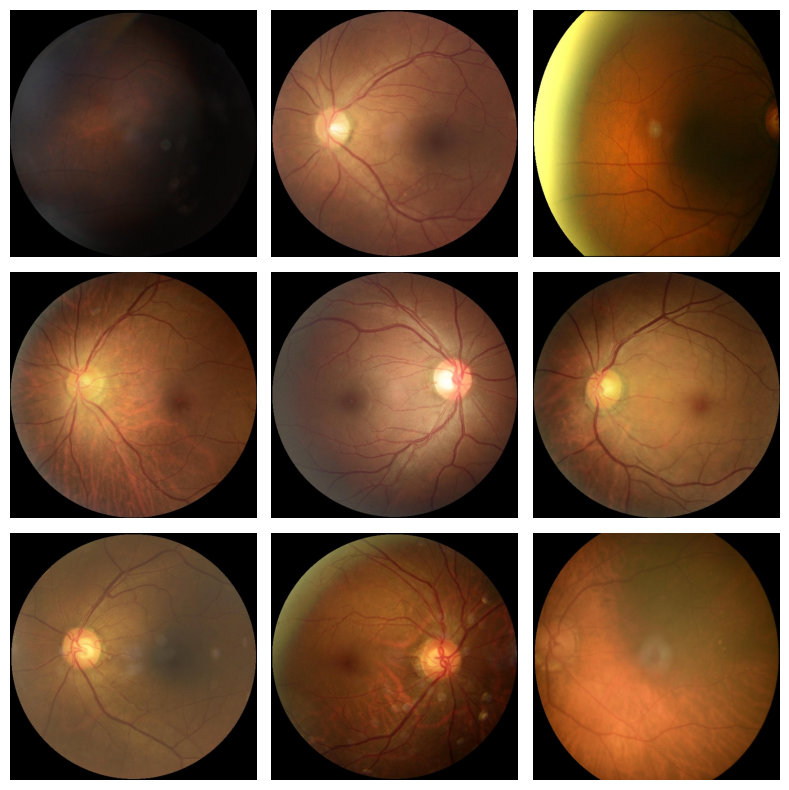

In [52]:
sample_plotting("Normal", "N")

✅ Sample of Diabetes (D) images:


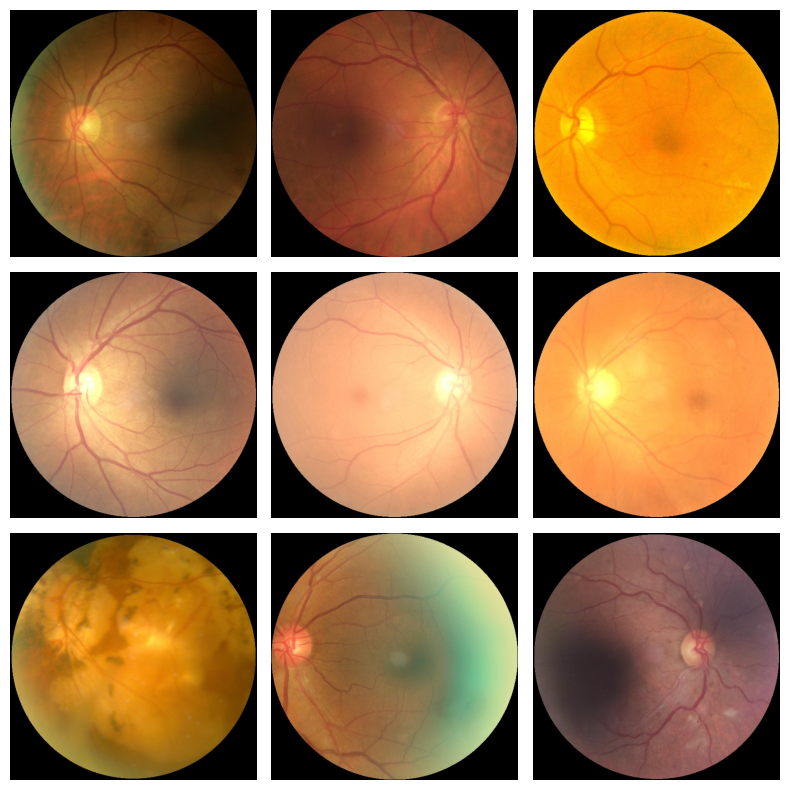

In [53]:
# sample plots for category: Diabetes (D)
sample_plotting("Diabetes", "D")

✅ Sample of Other diseases/abnormalities (O) images:


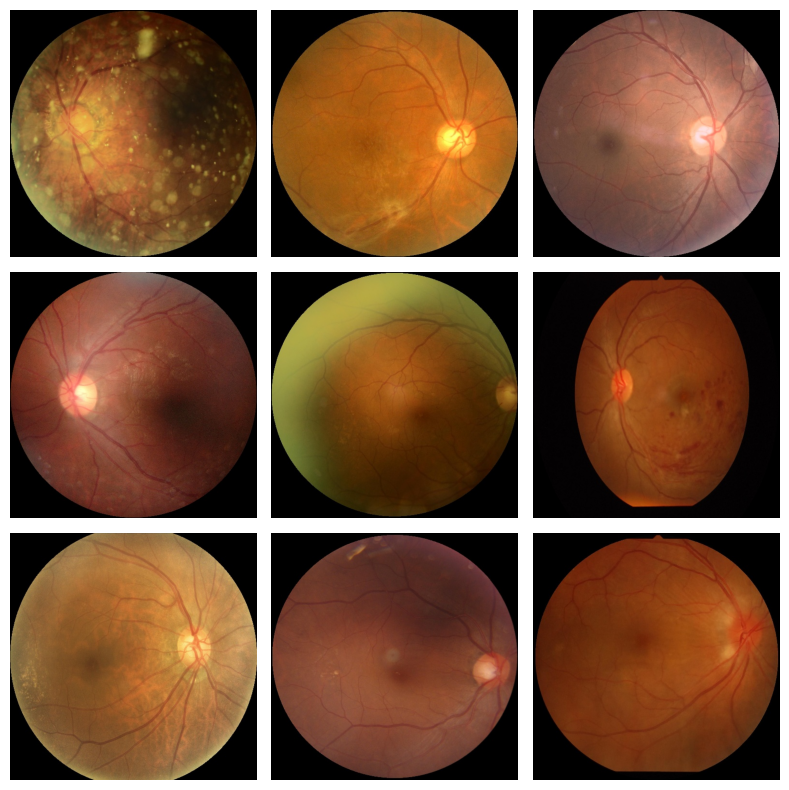

In [54]:
# sample plots for category: Other diseases/abnormalities (O)
sample_plotting("Other diseases/abnormalities", "O")

✅ Sample of Cataract (C) images:


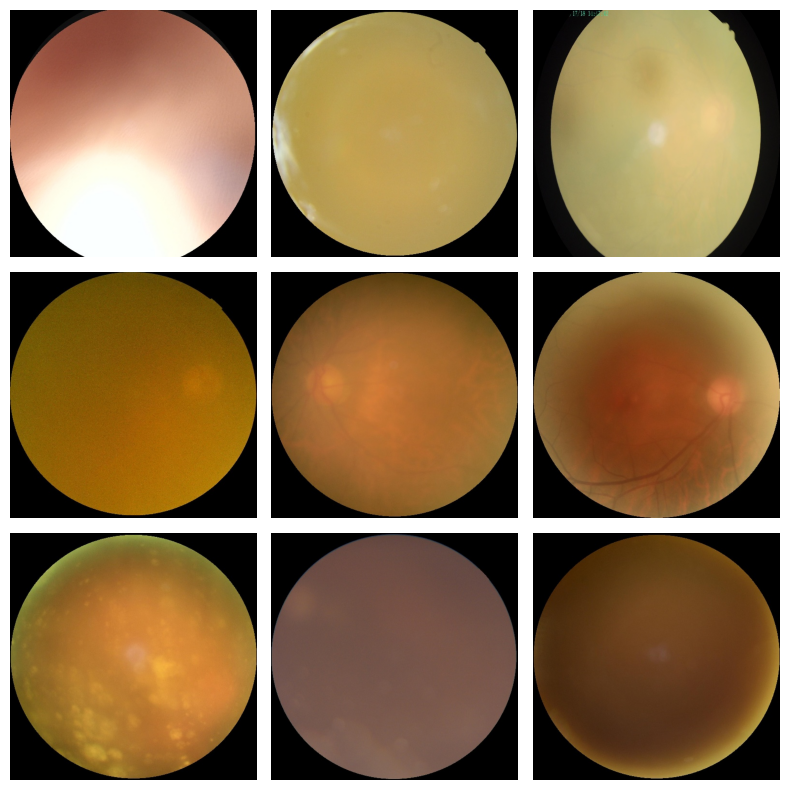

In [55]:
# sample plots for category: Cataract (C)
sample_plotting("Cataract", "C")

✅ Sample of Glaucoma (G) images:


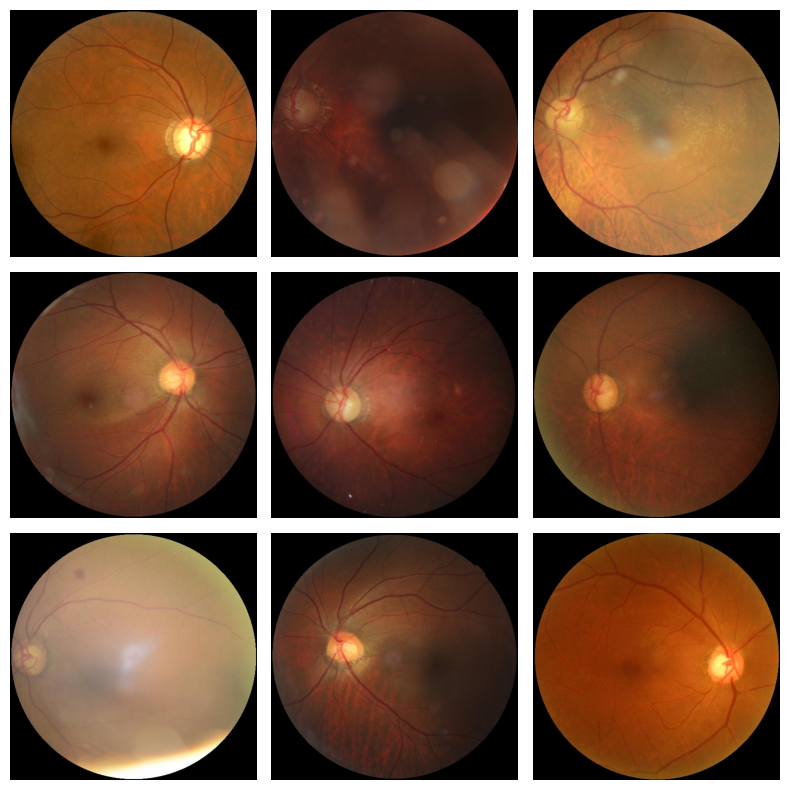

In [56]:
# sample plots for category: Glaucoma (G)
sample_plotting("Glaucoma", "G")

Sample of Age related Macular Degeneration (A) images:


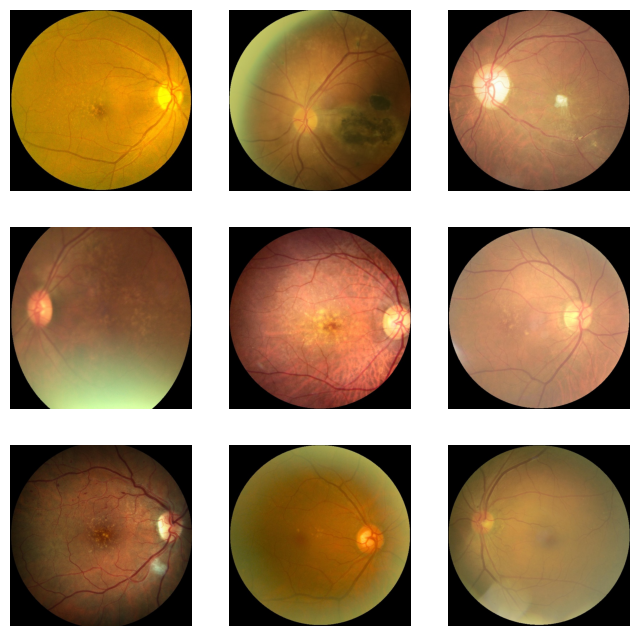

In [ ]:
# sample plots for category: Age related Macular Degeneration (A)
sample_plotting("Age related Macular Degeneration", "A")

Sample of Pathological Myopia (M) images:


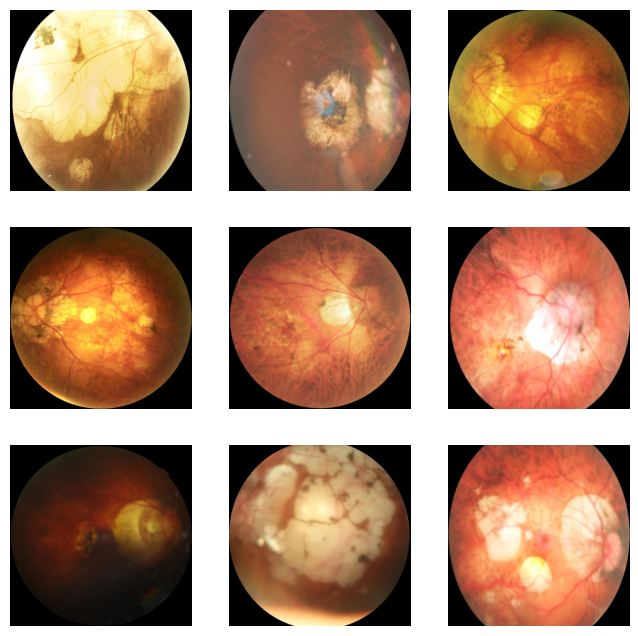

In [ ]:
# sample plots for category: Pathological Myopia (M)
sample_plotting("Pathological Myopia", "M")

✅ Sample of Hypertension (H) images:


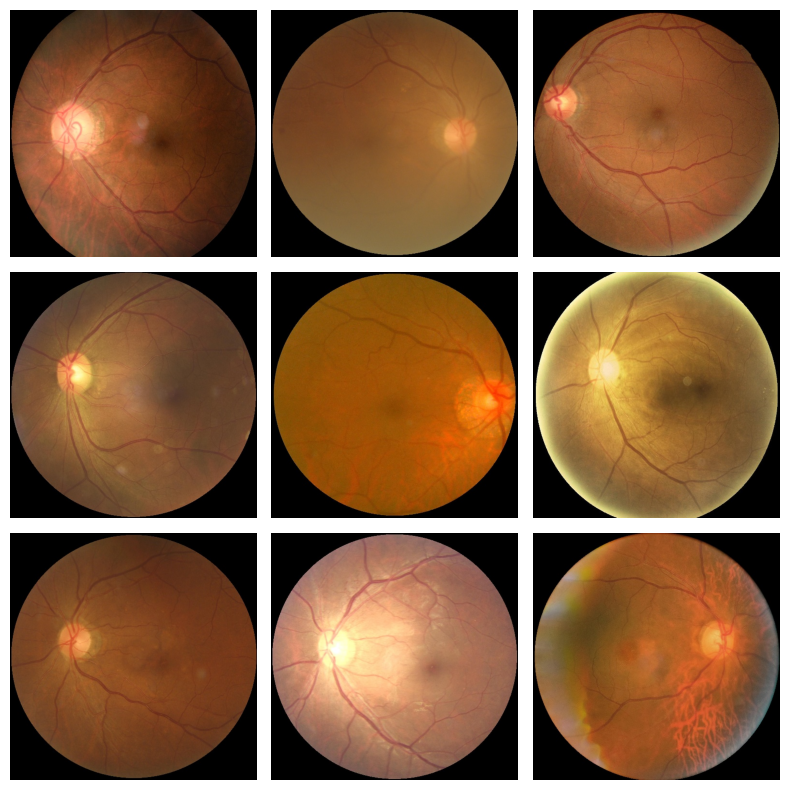

In [57]:
# sample plots for category: Hypertension (H)
sample_plotting("Hypertension", "H")

# Image Flipping

In [58]:
# import libraries
import os
import shutil

# to plot images
import imageio
import imageio.v2 as imageio
import matplotlib.pyplot as plt

# flipping process is done using cv2 library
import cv2

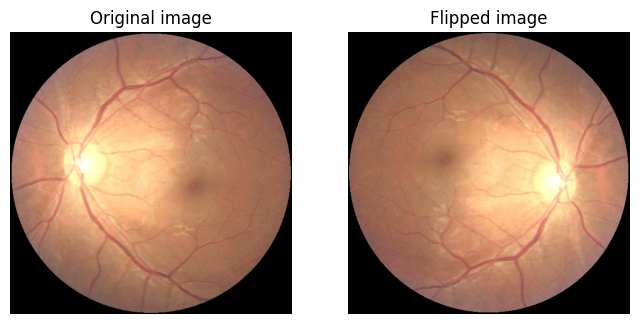

In [66]:
#/kaggle/working/labeled-images/train

sample_image = "C:/Users/avina/Ocular_Disease_Recognition/labeled-images/train/H/179_left.jpg"

# read image
im = imageio.imread(sample_image)

# flip image
flipped_image = cv2.flip(im, -1)

# plot image
f, ax = plt.subplots(1,2, figsize=(8,8))  

ax[0].title.set_text("Original image")
ax[0].imshow(im)
ax[0].axis('off')

ax[1].title.set_text("Flipped image")
ax[1].imshow(flipped_image)
ax[1].axis('off')

plt.show()

In [76]:
import os
import shutil
import cv2

'''
This function takes the actual dataset path and the new dataset path (train or test) and loops over the images,
applying the flip conversion to the right ones and moving the files to a new directory 
(right images are flipped and copied to the new directory and left images are just copied)
'''

def flip_images_to_directory(dataset_path, new_dataset_path):
    classes_path = [os.path.join(dataset_path, c) for c in os.listdir(dataset_path)]
    
    for class_directory in classes_path:
        class_name = os.path.basename(class_directory)
        new_class_path = os.path.join(new_dataset_path, class_name)

        if not os.path.exists(new_class_path):
            os.mkdir(new_class_path)

        images_path = [os.path.join(class_directory, im) for im in os.listdir(class_directory)]
        
        for im in images_path:
            aux = im.split(os.sep)
            new_path = os.path.join(new_dataset_path, aux[-2], aux[-1])

            if im.lower().endswith('right.jpg'):
                image = cv2.imread(im)
                if image is not None:
                    flipped_image = cv2.flip(image, -1)
                    cv2.imwrite(new_path, flipped_image)
                else:
                    print(f"⚠️ Could not read image: {im}")
            else:
                shutil.copyfile(im, new_path)


In [77]:
'''
This command might take some time (1 or 2 minutes) and requires permission to make new directories and copy files on them.
'''

# actual dataset paths
train_path = "C:/Users/avina/Ocular_Disease_Recognition/labeled-images/train"
test_path = "C:/Users/avina/Ocular_Disease_Recognition/labeled-images/test"

# new dataset paths
new_train_path = "C:/Users/avina/Ocular_Disease_Recognition/labeled-images-flipped/train"
new_test_path = "C:/Users/avina/Ocular_Disease_Recognition/labeled-images-flipped/test"

# create new main directory if not exists
if not os.path.exists('C:/Users/avina/Ocular_Disease_Recognition/labeled-images-flipped'): os.mkdir('C:/Users/avina/Ocular_Disease_Recognition/labeled-images-flipped') 

# create new train and test directories under main directory
if not os.path.exists(new_train_path): os.mkdir(new_train_path) 
if not os.path.exists(new_test_path): os.mkdir(new_test_path)


# Call the function to apply the conversion and copy the files to new directories
# for the train set
print("Applying flipping process to the train set and moving files to the new directory...")
flip_images_to_directory(train_path, new_train_path)
print('Done!')

# for the test set
print("Applying flipping process to the test set and moving files to the new directory...")
flip_images_to_directory(test_path, new_test_path)
print('Done!')

print('Flipping process finished successfully!')

Applying flipping process to the train set and moving files to the new directory...
Done!
Applying flipping process to the test set and moving files to the new directory...
Done!
Flipping process finished successfully!


# VGG19 MODEL

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Rescaling, Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG19

import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
train_dir = 'C:/Users/avina/Ocular_Disease_Recognition/labeled-images/train'
test_dir = 'C:/Users/avina/Ocular_Disease_Recognition/labeled-images/test'

BATCH_SIZE = 32
IMG_HEIGHT = 264
IMG_WIDTH = 264
EPOCHS = 100
#EPOCHS = 5

input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

In [11]:
training_generator = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=True,
    seed=432,
    validation_split=0.2,
    subset='training',
)

validation_generator = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=True,
    seed=432,
    validation_split=0.2,
    subset='validation',
)

test_generator = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    seed=432,
)

Found 5752 files belonging to 8 classes.
Using 4602 files for training.
Found 5752 files belonging to 8 classes.
Using 1150 files for validation.
Found 640 files belonging to 8 classes.


In [12]:
pretrained = VGG19(weights='imagenet', include_top=False)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Flatten, Dense, Activation

model = Sequential()

# Add input layer explicitly
model.add(Input(shape=input_shape))

# Add rescaling without input_shape
model.add(Rescaling(1./255))

model.add(pretrained)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))  # Optional regularization
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 264, 264, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 8, 8, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         2,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,481,096 (108.65 MB)

 Trainable params: 28,481,096 (108.65 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import os
import numpy as np

train_dir = 'C:/Users/avina/Ocular_Disease_Recognition/labeled-images/train'

# Get sorted list of categories (folder names)
cat_list = os.listdir(train_dir)
cat_list.sort()

# Get number of images in each category
lengths = [len(os.listdir(os.path.join(train_dir, cat))) for cat in cat_list]

# Total number of training images
total_train_images = np.sum(lengths)

# Compute class weights using inverse frequency and sqrt for balancing
weights = list(np.sqrt(np.round(1 / (np.array(lengths) / total_train_images), 2)))

# Print outputs
print("Categories:", cat_list)
print("Images per category:", lengths)
print("Computed class weights:", weights)


Categories: ['A', 'C', 'D', 'G', 'H', 'M', 'N', 'O']
Images per category: [239, 264, 1447, 256, 115, 209, 2585, 637]
Computed class weights: [4.906118628814432, 4.6679760067935225, 1.9949937343260002, 4.740253157796532, 7.07248188403477, 5.2459508194416005, 1.493318452306808, 3.004995840263344]


In [15]:
patience = 20

#early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='loss', patience=patience, restore_best_weights=True)

In [16]:
# freeze vgg16
pretrained.trainable = False

model.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Training
history = model.fit(
    training_generator,
    steps_per_epoch=len(training_generator), # BATCH_SIZE
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator), #BATCH_SIZE,
    verbose=1,
    callbacks = [early_stopping]
)
model.save('vgg19-100epoch-freeze.h5')

Epoch 1/100


144/144 ━━━━━━━━━━━━━━━━━━━━ 2332s 16s/step - accuracy: 0.3795 - loss: 2.4242 - val_accuracy: 0.4939 - val_loss: 1.3808
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3294s 23s/step - accuracy: 0.4673 - loss: 1.3980 - val_accuracy: 0.5113 - val_loss: 1.3023
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 6356s 44s/step - accuracy: 0.4956 - loss: 1.3085 - val_accuracy: 0.5183 - val_loss: 1.2990
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 7586s 53s/step - accuracy: 0.5084 - loss: 1.3069 - val_accuracy: 0.5130 - val_loss: 1.3008
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 33348s 233s/step - accuracy: 0.5037 - loss: 1.2949 - val_accuracy: 0.4748 - val_loss: 1.3013
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3404s 24s/step - accuracy: 0.4928 - loss: 1.3116 - val_accuracy: 0.4870 - val_loss: 1.2907
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3897s 27s/step - accuracy: 0.5361 - loss: 1.2286 - val_accuracy: 0.5096 - val_loss: 1.3214
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 18652s 130s/step - accuracy: 0.5427 - loss: 1

NameError: name 'model' is not defined

In [ ]:
model.save('vgg19-100epoch-freeze.h5')

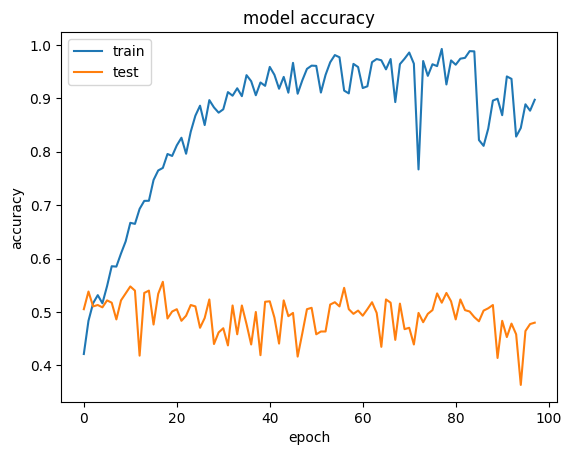

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

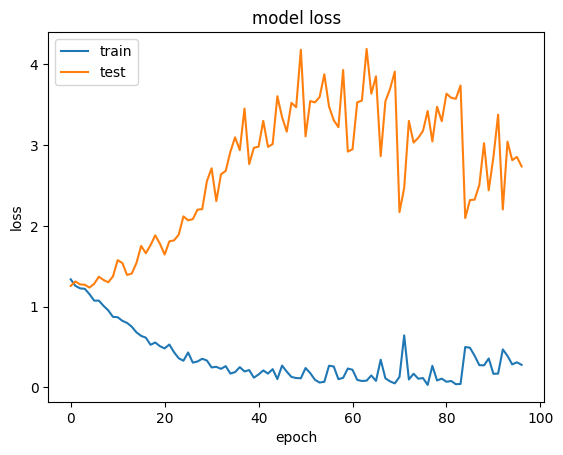

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = load_model('vgg16-100epoch-freeze.h5')

In [ ]:
y_pred = model.predict(test_generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step


In [ ]:
test_labels = []
for image_batch, labels_batch in test_generator:
  for vector in labels_batch:
    test_labels.append(vector.numpy().astype(int))

y_real = np.array(test_labels)

In [ ]:
y_pred_class = y_pred.argmax(axis=1)

In [ ]:
y_real_class = y_real.argmax(axis=1)

Text(50.722222222222214, 0.5, 'Truth')

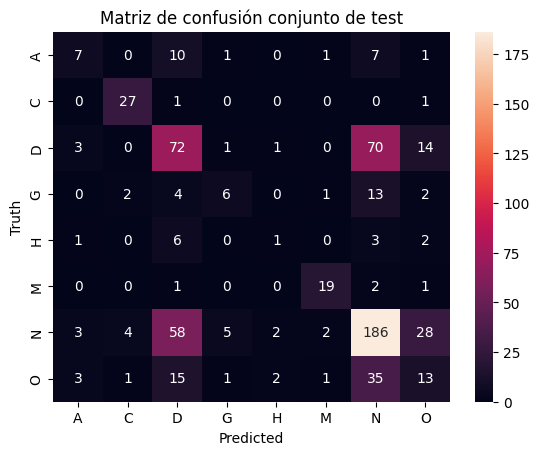

In [ ]:
labels = ['A', 'C', 'D', 'G', 'H', 'M', 'N', 'O']

cf_matrix = confusion_matrix(y_real_class, y_pred_class)
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='d')
plt.title('Matriz de confusión conjunto de test')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_real_class, y_pred_class, target_names=labels))

              precision    recall  f1-score   support

           A       0.41      0.26      0.32        27
           C       0.79      0.93      0.86        29
           D       0.43      0.45      0.44       161
           G       0.43      0.21      0.29        28
           H       0.17      0.08      0.11        13
           M       0.79      0.83      0.81        23
           N       0.59      0.65      0.62       288
           O       0.21      0.18      0.20        71

    accuracy                           0.52       640
   macro avg       0.48      0.45      0.45       640
weighted avg       0.50      0.52      0.51       640

